In [1]:
import numpy as np
from answers import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
(2, 20)
(20, 20)
(20, 20)
(20, 20)


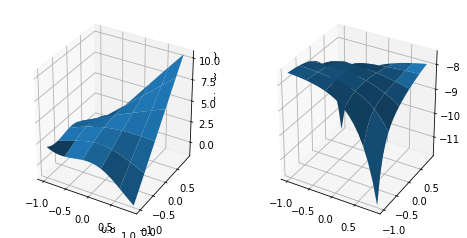

In [2]:
c = np.array([-1.0/6, -1.0/6])
C = np.array([[4, -1], [-1, 4]])
B = np.array([[3, -1], [-1, 3]])
a = np.array([1.0, 0])
b = np.array([0, -1.0])

def xT_matrix_x(vector_array, minus_vector=None, matrix=None):
    if minus_vector is not None:
        vector_array_minus_vector = vector_array[:] - minus_vector
    else:
        vector_array_minus_vector = minus_vector
    if matrix is not None:
        yy = np.array([np.dot(matrix, vector_array_minus_vector[0])])
        for i in range(1, len(vector_array_minus_vector)):
            temp = np.array([np.dot(matrix, vector_array_minus_vector[i])])
            yy = np.concatenate((yy, temp), axis=0)

    zz = np.array([np.dot(vector_array_minus_vector[0].T, vector_array_minus_vector[0])])
    for i in range(1, len(vector_array_minus_vector)):
        temp = np.array([np.dot(vector_array_minus_vector[0].T, vector_array_minus_vector[i])])
        zz = np.concatenate((zz, temp), axis=0)
    return zz

def function2(x):
    # (x[:,0]**2 + x[:,1]**2)
    print(x[:,1] - a[1])
    x_minus_a = np.array([x[:,0] - a[0], x[:,1] - a[1]])
    print(x_minus_a.shape)
    sin = np.sin(np.dot(x_minus_a.T, x_minus_a))
    print(sin.shape)
    x_minus_b = np.array([x[:,0] - b[0], x[:,1] - b[1]])

    product_B = np.dot(x_minus_b.T, np.dot(B, x_minus_b))
    print(product_B.shape)

    return sin + product_B

def function3(x):
    x_minus_a = np.array([x[:,0] - a[0], x[:,1] - a[1]])
    x_minus_b = np.array([x[:,0] - b[0], x[:,1] - b[1]])

    identity = np.identity(len(x)) / 100
    det = np.linalg.det(identity + np.dot(x, x.T))

    xTx = np.dot(x_minus_a.T, x_minus_a)
    xT_B_x = np.dot(x_minus_b.T, np.dot(B, x_minus_b))

    exp1 = np.exp(-xTx)
    exp2 = np.exp(-xT_B_x)
    log = np.log(det) / 10

    return 1 - (exp1 + exp2 - log)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.arange(-1, 1, 0.1)
Y = np.arange(-1, 1, 0.1)
xx = np.column_stack((X,Y))

X, Y = np.meshgrid(X, Y)

#===============
#  First subplot
#===============
ax = fig.add_subplot(1, 2, 1, projection='3d')

# xTx = xT_matrix_x(xx, a)
# sin_xTx = np.sin(xTx)
# xT_B_x = xT_matrix_x(xx, b, B)
# values = sin_xTx + xT_B_x

values = function2(xx)

print(values.shape)

ax.plot_surface(X, Y, values, rstride=4, cstride=4, linewidth=0)

#===============
#  Second subplot
#===============
ax = fig.add_subplot(1, 2, 2, projection='3d')

# xTx = xT_matrix_x(xx, a)
# xT_B_x = xT_matrix_x(xx, b, B)

# identity = np.identity(len(xx)) / 100
# det = np.linalg.det(identity + np.dot(xx, xx.T))

# exp1 = np.exp(-xTx)
# exp2 = np.exp(-xT_B_x)
# log = np.log(det) / 10

# values2 = 1 - (exp1 + exp2 - log)

values2 = function3(xx)

ax.plot_surface(X, Y, values2, rstride=4, cstride=4, linewidth=0)

plt.show()